In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../csgo/data/csgo_round_snapshots.csv')   
df.head(3)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [3]:
df.shape

(122410, 97)

In [4]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [5]:
df.isna().sum(axis=0).to_frame(name = 'missing').query('missing > 0')

,missing


In [6]:
num_feats_total = df.select_dtypes(include = ['float64','int64']).columns.shape[0]
bool_feats_total = df.select_dtypes(include = ['bool']).columns.shape[0]
categ_feats_total = df.select_dtypes(include = ['object']).columns.drop('round_winner').shape[0]

print(f'Categorical features total: {categ_feats_total}')
print(f'Boolean features total: {bool_feats_total}')
print(f'Numerical features total: {num_feats_total}')

Categorical features total: 1
Boolean features total: 1
Numerical features total: 94


In [7]:
df['bomb_planted'] = df['bomb_planted'].apply(int)
df['bomb_planted'].dtype

dtype('int64')

In [8]:
X = df[df.columns.drop('round_winner')]
y = df['round_winner']
np.unique(y)

array(['CT', 'T'], dtype=object)

We consider as a success when Counter Terrorists win. 

Hence, y = 1 if and only if CT else 0.

In [9]:
y = df['round_winner'].apply(lambda x : 1 if x == 'CT' else 0)
np.unique(y)

array([0, 1])

## EDA

In [10]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


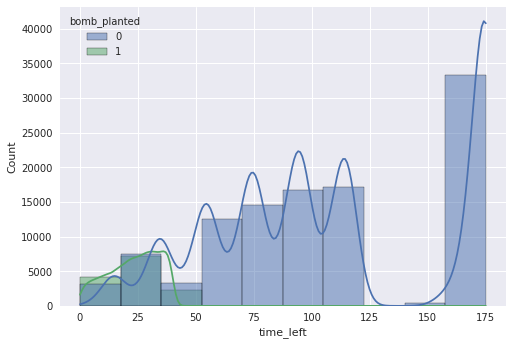

In [11]:
with plt.style.context('seaborn'):
    sns.histplot(data = df , x = 'time_left' , kde = True , bins = 10 , hue = 'bomb_planted')

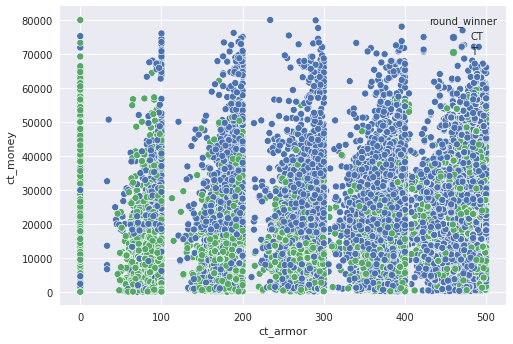

In [70]:
with plt.style.context('seaborn'):
    sns.scatterplot( data = df , x = 'ct_armor' , y = 'ct_money' , hue = 'round_winner')

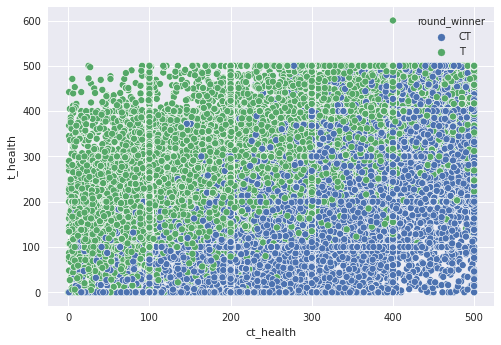

In [71]:
with plt.style.context('seaborn'):
    sns.scatterplot( data = df , x = 'ct_health' , y = 't_health' , hue = 'round_winner')

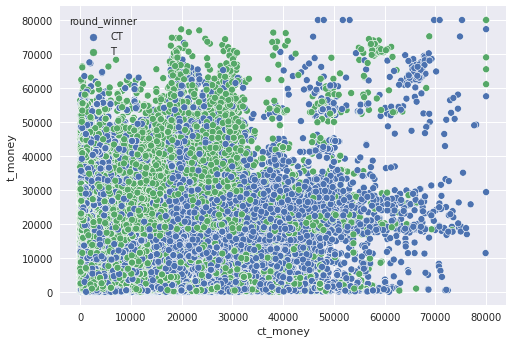

In [73]:
with plt.style.context('seaborn'):
    sns.scatterplot( data = df , x = 'ct_money' , y = 't_money' , hue = 'round_winner')

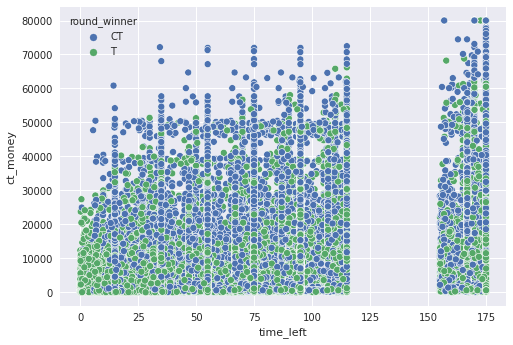

In [76]:
with plt.style.context('seaborn'):
    sns.scatterplot( data = df , x = 'time_left' , y = 'ct_money' , hue = 'round_winner')

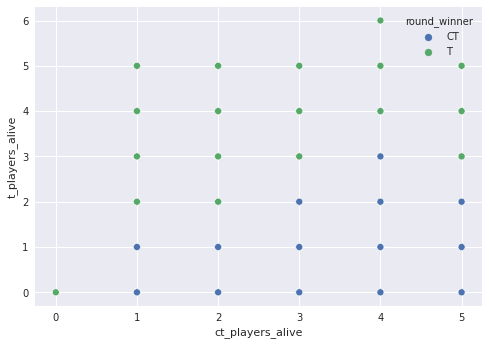

In [72]:
with plt.style.context('seaborn'):
    sns.scatterplot( data = df , x = 'ct_players_alive' , y = 't_players_alive' , hue = 'round_winner')

In [14]:
df_dummified['round_winner']

0         1
1         1
2         1
3         1
4         1
         ..
122405    0
122406    0
122407    0
122408    0
122409    0
Name: round_winner, Length: 122410, dtype: int64

In [13]:
df_dummified = pd.concat([df , pd.get_dummies(df['map'])] , axis = 1).drop(columns = ['map'])
df_dummified['round_winner'] = df_dummified['round_winner'].apply(lambda x : 1 if x == 'CT' else 0)
df_dummified.head()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,t_grenade_decoygrenade,round_winner,de_cache,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train,de_vertigo
0,175.00,0.0,0.0,0,500.0,500.0,0.0,0.0,4000.0,4000.0,...,0.0,1,0,1,0,0,0,0,0,0
1,156.03,0.0,0.0,0,500.0,500.0,400.0,300.0,600.0,650.0,...,0.0,1,0,1,0,0,0,0,0,0
2,96.03,0.0,0.0,0,391.0,400.0,294.0,200.0,750.0,500.0,...,0.0,1,0,1,0,0,0,0,0,0
3,76.03,0.0,0.0,0,391.0,400.0,294.0,200.0,750.0,500.0,...,0.0,1,0,1,0,0,0,0,0,0
4,174.97,1.0,0.0,0,500.0,500.0,192.0,0.0,18350.0,10750.0,...,0.0,1,0,1,0,0,0,0,0,0


In [67]:
def get_correlations(data , threshold : float , only_target : bool = False):
    '''Builds a sorted correlation dataframe keeping only features with an absolute correlation above the
    given threshold. The only_target attribute maintains only the correlations of the features with the 
    target variable.'''
    
    temp = data.corr()\
          .unstack()\
          .reset_index()\
          .rename(columns = {'level_0':'feat_x',
                             'level_1':'feat_y',
                              0:'correlation'})\
          .query(f'abs(correlation) >= {threshold} & feat_x != feat_y')
          
    
    temp['combined'] = (temp['feat_x'] + ',' + temp['feat_y']).apply(lambda x : {x.split(',')[0],
                                                                                 x.split(',')[1]})
    
    duplicated_index = temp['combined'].duplicated(keep = 'first')\
                                       .to_frame(name = 'condition')\
                                       .query('condition == True')\
                                       .index
    
    temp = temp[~ temp.index.isin(duplicated_index)].assign(abs_corr = lambda x : abs(x['correlation']))\
                                                    .sort_values(by = ['abs_corr'] , 
                                                                ascending = False)
    
    subset = 'correlation'
    if only_target:
        subset = 'corr_with_target'
        temp = temp.query('feat_y == "round_winner"')\
                   .drop(columns = ['feat_y'])\
                   .rename(columns = {'correlation':subset})
    
    return temp.reset_index()\
                .drop(columns = [ 'abs_corr' , 'combined' , 'index'])\
                .style\
                .format('{:.3f}', subset = subset)\
                .background_gradient(cmap = 'summer')
    
temp = get_correlations(df_dummified , 
                        threshold = 0.1, 
                        only_target = True)
temp

,feat_x,corr_with_target
0,ct_armor,0.336
1,ct_helmets,0.308
2,t_helmets,-0.297
3,ct_defuse_kits,0.292
4,t_armor,-0.291
5,ct_grenade_flashbang,0.254
6,ct_players_alive,0.217
7,ct_grenade_smokegrenade,0.210
8,ct_weapon_awp,0.199
9,t_weapon_ak47,-0.194


In [68]:
leakage_threshold = 0.8

temp = get_correlations(df_dummified , 
                        threshold = leakage_threshold, 
                        only_target = False)
temp

,feat_x,feat_y,correlation
0,ct_health,ct_players_alive,0.972
1,t_health,t_players_alive,0.956
2,t_armor,t_helmets,0.878
3,t_grenade_flashbang,t_grenade_smokegrenade,0.832
4,t_grenade_flashbang,t_grenade_molotovgrenade,0.819
5,t_grenade_smokegrenade,t_grenade_molotovgrenade,0.812
6,ct_grenade_flashbang,ct_grenade_smokegrenade,0.805
7,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade,0.801


In [44]:
df_dummified.shape[1]

104

## PCA

In [10]:
from sklearn.decomposition import PCA

# pca = PCA(n_components = X[X.columns.drop('map')].shape[1])
# pca.fit( X[X.columns.drop('map')])

PCA(n_components=95)

## Tensorflow

In [18]:
dummies = pd.get_dummies(X['map'])
X = pd.concat([X , dummies] , axis = 1).drop(columns = ['map'])
X.dtypes

time_left       float64
ct_score        float64
t_score         float64
bomb_planted      int64
ct_health       float64
                 ...   
de_mirage         uint8
de_nuke           uint8
de_overpass       uint8
de_train          uint8
de_vertigo        uint8
Length: 103, dtype: object

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers

def initialize_model(X):
    model = models.Sequential()
    
    model.add(layers.Dense(10 , input_dim = X.shape[1] , activation = 'relu'))
    model.add(layers.Dense(10 , activation = 'relu'))
    model.add(layers.Dense(1 , activation = 'sigmoid'))
    
    model.compile(optimizer = 'Adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy']
                  )
    
    return model

model = initialize_model(X)

In [20]:
X = np.asarray(X).astype(np.float32)

In [21]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.3 , random_state = 0)

In [24]:
model.fit(X_train ,y_train , epochs = 1)

2678/2678 [==============================] - 2s 836us/step - loss: 2.1850 - accuracy: 0.6840


## First Prediction Attempts

In [77]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer , make_column_selector
from sklearn.preprocessing import RobustScaler , StandardScaler , MinMaxScaler , OneHotEncoder , LabelEncoder
from sklearn import set_config
set_config(display='diagram')

In [78]:
df.select_dtypes(include = 'bool').columns

Index([], dtype='object')

In [79]:
categorical_pipe = make_pipeline( OneHotEncoder(sparse = False , 
                                                handle_unknown = 'ignore'))

numerical_pipe = make_pipeline( RobustScaler() )

num_feats = X.select_dtypes(include = ['float64','int64']).columns.drop('bomb_planted')
cat_feats = X.select_dtypes(include = ['object']).columns

preproc_pipe = make_column_transformer( 
                         ( RobustScaler() , num_feats)
                        # ( OneHotEncoder() , cat_feats )
                         ,
remainder = 'passthrough')

preproc_pipe

ColumnTransformer(remainder='passthrough',
                  transformers=[('robustscaler', RobustScaler(),
                                 Index(['time_left', 'ct_score', 't_score', 'ct_health', 't_health', 'ct_armor',
       't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets',
       'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp'...
       't_weapon_p2000', 'ct_weapon_tec9', 't_weapon_tec9',
       'ct_grenade_hegrenade', 't_grenade_hegrenade', 'ct_grenade_flashbang',
       't_grenade_flashbang', 'ct_grenade_smokegrenade',
       't_grenade_smokegrenade', 'ct_grenade_incendiarygrenade',
       't_grenade_incendiarygrenade', 'ct_grenade_molotovgrenade',
       't_grenade_molotovgrenade', 'ct_grenade_decoygrenade',
       't_grenade_decoygrenade'],
      dtype='object'))])

In [82]:
X = df_dummified[df_dummified.columns.drop('round_winner')]
y = df_dummified['round_winner']
preproc_pipe.fit_transform(X).shape

(122410, 103)

## Predictive Analysis

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , \
                           AdaBoostClassifier , \
                           RandomForestClassifier , \
                           GradientBoostingClassifier , \
                           VotingClassifier , \
                           StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

### Defining a Baseline

In [85]:
baseline = max( y.mean() , 1 - y.mean())
baseline

0.5098112899272935

We can see that the dataset is balanced.

In [126]:
X_train , X_test , y_train , y_test = train_test_split( X  , y  , random_state = 0 , test_size = 0.3)

### Defining our first Logistic Regression Model

In [145]:
def bake_pipeline(model , X  , y , **kwargs ):
    X_train , X_test , y_train , y_test = train_test_split( X  , y  , random_state = 0 , test_size = 0.3)
    pred_pipe = make_pipeline( preproc_pipe , model(**kwargs) )
    pred_pipe.fit(X_train , y_train)
    print(pred_pipe.score(X_test , y_test))
    return pred_pipe

pred_pipe = bake_pipeline( DecisionTreeClassifier , X , y)
pred_pipe

0.813931323693598


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  Index(['time_left', 'ct_score', 't_score', 'ct_health', 't_health', 'ct_armor',
       't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets',
       'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapo...
       'ct_grenade_hegrenade', 't_grenade_hegrenade', 'ct_grenade_flashbang',
       't_grenade_flashbang', 'ct_grenade_smokegrenade',
       't_grenade_smokegrenade', 'ct_grenade_incendiarygrenade',
       't_grenade_incendiarygrenade', 'ct_grenade_molotovgrenade',
       't_grenade_molotovgrenade', 'ct_grenade_decoygrenade',
       't_grenade_decoygrenade'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [141]:
def get_feature_importances(trained_model , X_test):
    importances_df = pd.DataFrame(trained_model.feature_importances_ , 
                                  columns =  ['importance'] ,
                                  index = X_test.columns)\
                     .assign(abs_importance = lambda x : abs(x['importance']))\
                     .sort_values(by = ['abs_importance'] , ascending = False)\
                     .drop(columns = ['abs_importance'])\
                     .query('abs(importance) > 0.01')
    
    return importances_df

get_feature_importances( pred_pipe.steps[-1][-1] , X_test)

,importance
t_health,0.194385
ct_armor,0.143089
ct_money,0.060685
t_armor,0.059543
time_left,0.051032
ct_score,0.030692
t_score,0.028166
ct_health,0.027384
ct_helmets,0.024054
bomb_planted,0.024000


In [147]:
pred_pipe = bake_pipeline(LogisticRegression , X , y , max_iter = 1000)

0.7487678021948098


In [155]:
pd.DataFrame(pred_pipe.steps[-1][-1].coef_.reshape(-1,1) , 
             columns = ['importance'] , 
             index = X_test.columns)\
           .assign(abs_importance = lambda x : abs(x))\
           .sort_values(by = ['abs_importance'] , ascending = False)\
           .query('abs(importance) > 0.5')\
           .drop(columns = ['abs_importance'])\
           .style.format('{:.3f}').background_gradient(cmap = 'spring')

,importance
t_grenade_decoygrenade,-1.082
ct_weapon_nova,1.003
t_weapon_nova,0.939
ct_weapon_sawedoff,-0.925
ct_weapon_m4a1s,-0.903
t_weapon_m4a1s,0.838
t_health,0.837
ct_armor,-0.818
ct_weapon_ak47,-0.814
ct_helmets,-0.789


In [168]:
rf = RandomForestClassifier()
pipe = make_pipeline( preproc_pipe , rf)
pipe.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  Index(['time_left', 'ct_score', 't_score', 'ct_health', 't_health', 'ct_armor',
       't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets',
       'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapo...
       'ct_grenade_hegrenade', 't_grenade_hegrenade', 'ct_grenade_flashbang',
       't_grenade_flashbang', 'ct_grenade_smokegrenade',
       't_grenade_smokegrenade', 'ct_grenade_incendiarygrenade',
       't_grenade_incendiarygrenade', 'ct_grenade_molotovgrenade',
       't_grenade_molotovgrenade', 'ct_grenade_decoygrenade',
       't_grenade_decoygrenade'],
      dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [169]:
pipe.score(X_test , y_test)

0.8714157340086595

In [159]:
xgb = XGBClassifier()
pipe = make_pipeline( preproc_pipe , xgb)
pipe.fit(X_train , y_train)

/home/nicole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  Index(['time_left', 'ct_score', 't_score', 'ct_health', 't_health', 'ct_armor',
       't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets',
       'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapo...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [160]:
pipe.score(X_test , y_test)

0.7996895678457643

In [163]:
get_feature_importances( pipe.steps[-1][-1] , X_test)

,importance
t_health,0.114992
ct_armor,0.084436
ct_players_alive,0.073527
ct_helmets,0.068321
t_grenade_decoygrenade,0.038593
ct_defuse_kits,0.029325
time_left,0.020885
bomb_planted,0.017583
ct_health,0.016279
t_weapon_cz75auto,0.013549


### Untuned Model Performances

In [86]:
models = {# 'RandomForest':RandomForestClassifier,
          'LogisticRegression': LogisticRegression , 
          'DecisionTree':DecisionTreeClassifier,
          #'AdaBoost':AdaBoostClassifier,
          'GradientBoost':GradientBoostingClassifier
          #'XGB':XGBClassifier
          }

model_tuning_params = {key:{} for key in models.keys()}
model_tuning_params

{'LogisticRegression': {}, 'DecisionTree': {}, 'GradientBoost': {}}

In [89]:
class CrossValidator:
    
    def __init__(self):
        pass
    
    def __repr__(self):
        return ''
    
validator = CrossValidator()
validator

In [106]:
mean_validation_scores = {}

for model , model_obj in models.items():
    print(f"Initializing validation process with {model=}...")
    pred_pipe = make_pipeline( preproc_pipe , 
                              model_obj( **model_tuning_params.get(model)) )
    mean_validation_scores[model] = cross_validate(pred_pipe , 
                                                     X , 
                                                     y , 
                                                     n_jobs = -1 , 
                                                     cv = 5)['test_score'].mean()
    
    
    print(f"{model=} has finished training with score: \t {mean_validation_scores[f'{model}']}!",
          end = '\n'*2)

Initializing validation process with model='LogisticRegression'...
model='LogisticRegression' has finished training with score: 	 0.7462380524466956!

Initializing validation process with model='DecisionTree'...
model='DecisionTree' has finished training with score: 	 0.7023527489584184!

Initializing validation process with model='GradientBoost'...
model='GradientBoost' has finished training with score: 	 0.7528224818233804!



In [117]:
pred_pipes['LogisticRegression'].steps[-1][-1].coefs_

AttributeError: 'LogisticRegression' object has no attribute 'coefs_'

In [108]:
sorted_val_scores = dict(sorted(mean_validation_scores.items() , 
                           key = lambda x : x[1] , 
                           reverse = True))
sorted_val_scores

{'GradientBoost': 0.7528224818233804,
 'LogisticRegression': 0.7462380524466956,
 'DecisionTree': 0.7023527489584184}

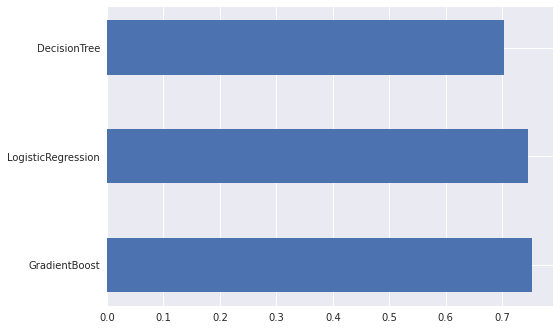

In [93]:
with plt.style.context('seaborn'):
    plt.barh(list(sorted_val_scores.keys()) ,
         list(sorted_val_scores.values()), 
        height = 0.5)

In [182]:
voting = VotingClassifier(estimators = [#('logreg',LogisticRegression(max_iter=1000)),
                                        ('xgb', XGBClassifier() ),
                                        ('rf' , RandomForestClassifier() 
                                        )],
                           voting = 'hard')

In [183]:
cv = cross_validate(voting , X , y , n_jobs = - 1 , cv = 5)

In [184]:
cv

{'fit_time': array([172.33589029, 172.01430702, 172.11259866, 171.71593761,
        172.35492587]),
 'score_time': array([1.05829406, 1.10615563, 1.14143658, 1.41230202, 1.26179218]),
 'test_score': array([0.74667102, 0.7497345 , 0.7542276 , 0.74736541, 0.73980884])}

In [185]:
cv['test_score'].mean()

0.747561473735806

[15:31:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/nicole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nicole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_en

[15:31:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/nicole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/nicole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

[15:31:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/nicole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nicole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_en

[15:38:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/nicole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/nicole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:31:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/nicole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nicole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_en

[15:41:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/nicole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/nicole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:41:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/nicole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
